In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
df=pd.read_csv(r"C:\Users\Nomitech\Desktop\github\Uber Drives -  (1).csv")


### Check For Missing Values

In [4]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [7]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

### Convert Dates to the right format

In [12]:
df['START_DATE*']=pd.to_datetime(df['START_DATE*'],format='%m/%d/%y %H:%M')
df['END_DATE*']=pd.to_datetime(df['START_DATE*'],format='%m/%d/%y %H:%M')


In [14]:
hour = []
day=[]
dayofweek=[]
month=[]
weekday=[]
for i in df['START_DATE*']:
    hour.append(i.hour)
    day.append(i.day)
    month.append(i.month)
    dayofweek.append(i.dayofweek)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
df['Hour']=hour
df['Day']=day
df['Dayofweek']=dayofweek
df['Month']=month
df['weekday']=weekday

In [15]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Dayofweek,Month,weekday
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:15:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


### Categories We have

In [18]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'Hour', 'Day', 'Dayofweek', 'Month', 'weekday'],
      dtype='object')

In [20]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

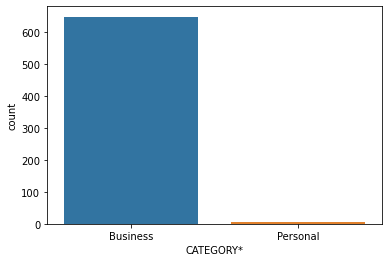

In [21]:
sns.countplot(x='CATEGORY*',data=df)

## How long do people travel with Uber?

<AxesSubplot:ylabel='Frequency'>

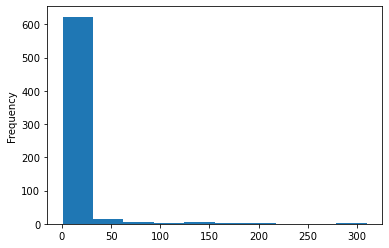

In [24]:
df['MILES*'].plot.hist()

## What Hour do most people take uber to their Destination?

In [25]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Dayofweek,Month,weekday
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:15:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [26]:
df['Hour'].value_counts()

13    55
14    52
15    51
18    51
17    51
20    45
16    45
12    43
11    39
19    35
21    34
10    33
9     26
22    21
23    21
8     17
0     13
7      8
1      4
5      3
3      3
6      2
2      1
Name: Hour, dtype: int64

In [30]:
hours=df['START_DATE*'].dt.hour.value_counts()

Text(0.5, 1.0, 'Number of Trips vs Hours')

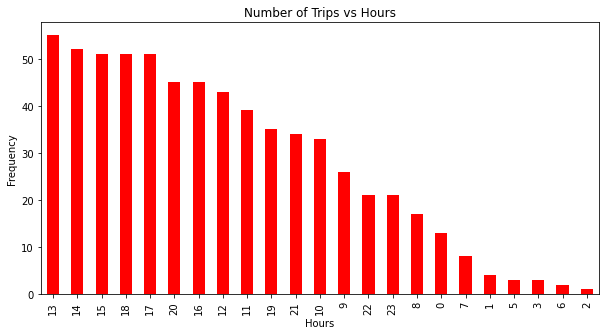

In [33]:
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips vs Hours')

### Check the purpose of Trips

<AxesSubplot:>

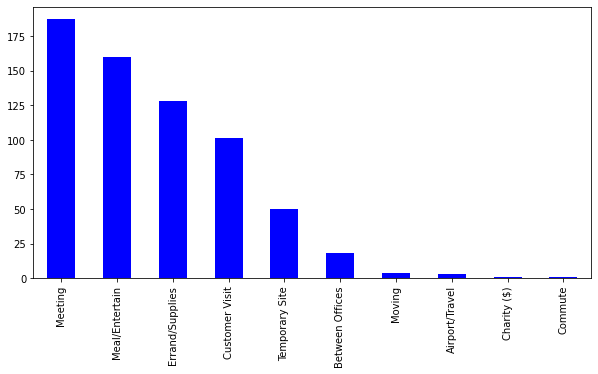

In [37]:
df['PURPOSE*'].value_counts().plot(kind='bar',color='blue',figsize=(10,5))

### Which Day has the Highest Number of Trips

In [40]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'Hour', 'Day', 'Dayofweek', 'Month', 'weekday'],
      dtype='object')

<AxesSubplot:>

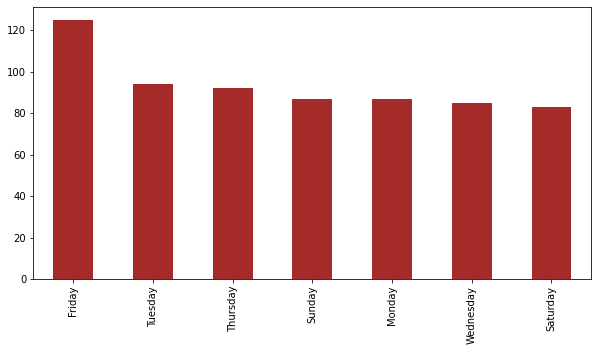

In [43]:
df['weekday'].value_counts().plot(kind='bar',color='brown',figsize=(10,5))

## the Best Month

<AxesSubplot:>

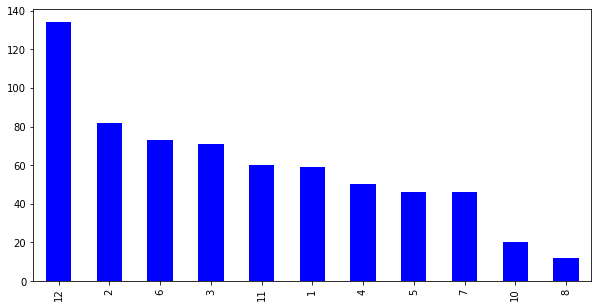

In [46]:
df['Month'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

In [49]:
df['START*']

0            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
5        West Palm Beach
              ...       
1150             Kar?chi
1151             Kar?chi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
Name: START*, Length: 653, dtype: object

### Remove "?" From the START Column

In [56]:
df['START*']=df.loc[:,'START*'].str.replace('?','',regex=True)

In [57]:
df['START*']

0            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
5        West Palm Beach
              ...       
1150              Karchi
1151              Karchi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
Name: START*, Length: 653, dtype: object

### Replace Unknown Location

In [63]:
df['START*'].mode()

0    Cary
dtype: object

In [68]:
df['START*']=df['START*'].str.replace('Unknown Location','Cary',regex=True)

In [69]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Dayofweek,Month,weekday
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:15:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:07:00,Business,Karchi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:24:00,Business,Karchi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:03:00,Business,Cary,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:32:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday
